In [26]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.0f}'.format
from nltk.corpus import stopwords
import pymysql
import re

In [31]:
connection = pymysql.connect(
    user='root',
    password='root',
    host='localhost',
    database='linkedin'
)

data = pd.read_sql("SELECT * FROM linkedin_jobs", connection)

# Close the connection
connection.close()

C:\Users\as429\AppData\Local\Temp\ipykernel_11564\749995261.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql("SELECT * FROM linkedin_jobs", connection)


In [32]:
data.head()

job_id              Keywords  \
0  2787267844  Technical Consultant   
1  2879454952      Business Analyst   
2  2985065172    Operations Analyst   
3  3018289129      Python Developer   
4  3018289169  Technical Consultant   

                                       job_title  \
0  MS Dynamic 365 Technical Consultant/Developer   
1                               Business Analyst   
2  Sr. Analyst Business Process – Internal Audit   
3                              Software Engineer   
4                            Software Consultant   

                     company_name                 job_location  \
0  LTI - Larsen & Toubro Infotech   Mumbai, Maharashtra, India   
1                            None                United States   
2            Luminar Technologies      New Delhi, Delhi, India   
3                  Partners Group   Mumbai Metropolitan Region   
4               Hexagon R&D India  Hyderabad, Telangana, India   

            date_posted num_applicants  \
0  Reposted 2 years ago           None   
1  Reposted 3 weeks ago            100   
2   Reposted 2 days ago            100   
3            1 week ago             75   
4            1 week ago              4   

                                            insights  \
0  Remote\nMatches your job preferences, workplac...   
1  Remote\nMatches your job preferences, workplac...   
2  On-site\nMatches your job preferences, workpla...   
3  Hybrid\nMatches your job preferences, workplac...   
4  Hybrid\nMatches your job preferences, workplac...   

                                            job_link  \
0  https://www.linkedin.com/jobs/view/2787267844/...   
1  https://www.linkedin.com/jobs/view/2879454952/...   
2  https://www.linkedin.com/jobs/view/2985065172/...   
3  https://www.linkedin.com/jobs/view/3018289129/...   
4  https://www.linkedin.com/jobs/view/3018289169/...   

                                     job_description  
0  About the job\nCandidates need to have experie...  
1  About the job\nCompany Overview:\n\nMSIG North...  
2  About the job\nLuminar is a global automotive ...  
3  About the job\nWhat It's About\n\nThe Business...  
4  About the job\nResponsibilities\n\nDesign & im...

In [11]:
# Read job keywords from the text file
with open('job keywords.txt', 'r') as file:
    job_keywords = file.read()
    
# Clean job keywords
job_keywords = job_keywords.replace("'", "").split(',')
job_keywords = [f" {keyword.strip().lower()} " for keyword in job_keywords]

In [12]:
data.shape

(21839, 10)

In [37]:
sample_df = data.sample(n=500, random_state=1)

In [39]:
sample_df.to_csv('sample.csv')

In [13]:
data.duplicated().sum()

0

In [33]:
data.describe(include=[object])

job_id        Keywords      job_title        company_name  \
count        21839           21839          21839               20554   
unique       21839              29          11628                5812   
top     2787267844  Data Scientist  Data Engineer  Accenture in India   
freq             1            2821            750                1000   

                    job_location date_posted num_applicants  \
count                      21587       21490          21069   
unique                       320         178            101   
top     Pune, Maharashtra, India  1 week ago            100   
freq                        3056        1865           7119   

                                                 insights  \
count                                               21438   
unique                                              14860   
top     Remote\nMatches your job preferences, workplac...   
freq                                                  213   

                                                 job_link  \
count                                               21839   
unique                                              21839   
top     https://www.linkedin.com/jobs/view/2787267844/...   
freq                                                    1   

                                          job_description  
count                                               21839  
unique                                              17775  
top     About the job\nA well-funded AI research compa...  
freq                                                  290

In [93]:
data['job_description'] = data['job_description'].str.lstrip("About the job\n")

In [35]:
data.head()

job_id              Keywords  \
0  2787267844  Technical Consultant   
1  2879454952      Business Analyst   
2  2985065172    Operations Analyst   
3  3018289129      Python Developer   
4  3018289169  Technical Consultant   

                                       job_title  \
0  MS Dynamic 365 Technical Consultant/Developer   
1                               Business Analyst   
2  Sr. Analyst Business Process – Internal Audit   
3                              Software Engineer   
4                            Software Consultant   

                     company_name                 job_location  \
0  LTI - Larsen & Toubro Infotech   Mumbai, Maharashtra, India   
1                            None                United States   
2            Luminar Technologies      New Delhi, Delhi, India   
3                  Partners Group   Mumbai Metropolitan Region   
4               Hexagon R&D India  Hyderabad, Telangana, India   

            date_posted num_applicants  \
0  Reposted 2 years ago           None   
1  Reposted 3 weeks ago            100   
2   Reposted 2 days ago            100   
3            1 week ago             75   
4            1 week ago              4   

                                            insights  \
0  Remote\nMatches your job preferences, workplac...   
1  Remote\nMatches your job preferences, workplac...   
2  On-site\nMatches your job preferences, workpla...   
3  Hybrid\nMatches your job preferences, workplac...   
4  Hybrid\nMatches your job preferences, workplac...   

                                            job_link  \
0  https://www.linkedin.com/jobs/view/2787267844/...   
1  https://www.linkedin.com/jobs/view/2879454952/...   
2  https://www.linkedin.com/jobs/view/2985065172/...   
3  https://www.linkedin.com/jobs/view/3018289129/...   
4  https://www.linkedin.com/jobs/view/3018289169/...   

                                     job_description  
0  About the job\nCandidates need to have experie...  
1  About the job\nCompany Overview:\n\nMSIG North...  
2  About the job\nLuminar is a global automotive ...  
3  About the job\nWhat It's About\n\nThe Business...  
4  About the job\nResponsibilities\n\nDesign & im...

In [97]:
import seaborn as sns

In [106]:
data['date_posted'].value_counts()

2 weeks ago                1435
1 week ago                 1330
Reposted 2 weeks ago       1189
1 month ago                1163
Reposted 1 week ago        1163
                           ... 
Reposted 17 minutes ago       1
Reposted 7 months ago         1
Reposted 12 months ago        1
Reposted 10 months ago        1
Reposted 47 minutes ago       1
Name: date_posted, Length: 176, dtype: int64

In [40]:
sns.countplot(data=data, x='company_name',)

NameError: name 'sns' is not defined

In [18]:
data['job_title'].value_counts().head(20)

data engineer                         579
data scientist                        328
python developer                      252
data analyst                          236
order to cash operations analyst      161
machine learning engineer             136
ai / ml engineer                      135
azure data engineer                   119
record to report ops analyst          111
senior data engineer                  107
analyst                               102
database administrator                101
remote python data science analyst     96
mathematical research analyst          89
research analyst - math                81
software engineer                      81
math research analyst                  81
remote data science analyst            73
senior data scientist                  64
oracle database administrator          62
Name: job_title, dtype: int64

In [24]:
job_categories = data['job_title'].value_counts().head(20).index.tolist()

['data engineer',
 'data scientist',
 'python developer',
 'data analyst',
 'order to cash operations analyst',
 'ai / ml engineer',
 'machine learning engineer',
 'record to report ops analyst',
 'database administrator',
 'analyst',
 'azure data engineer',
 'remote python data science analyst',
 'mathematical research analyst',
 'research analyst - math',
 'software engineer',
 'math research analyst',
 'remote data science analyst',
 'senior data engineer',
 'oracle database administrator',
 'financial analyst']

In [11]:
# Preprocess the job descriptions
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text


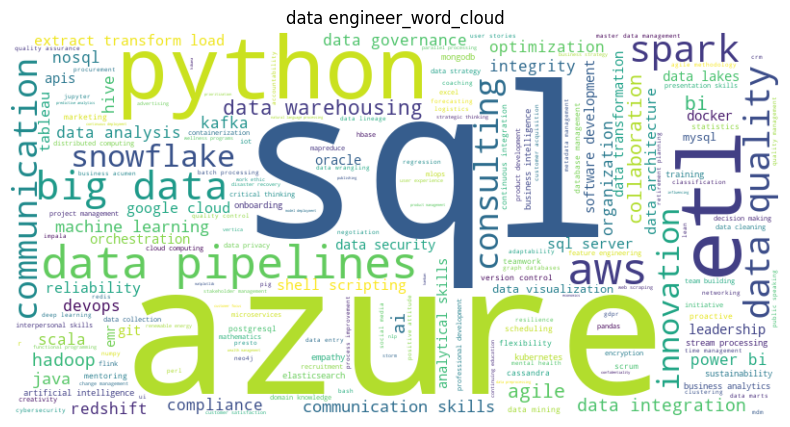

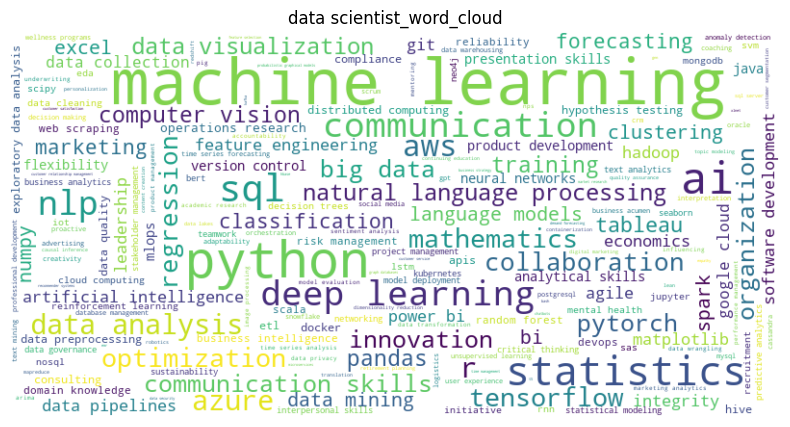

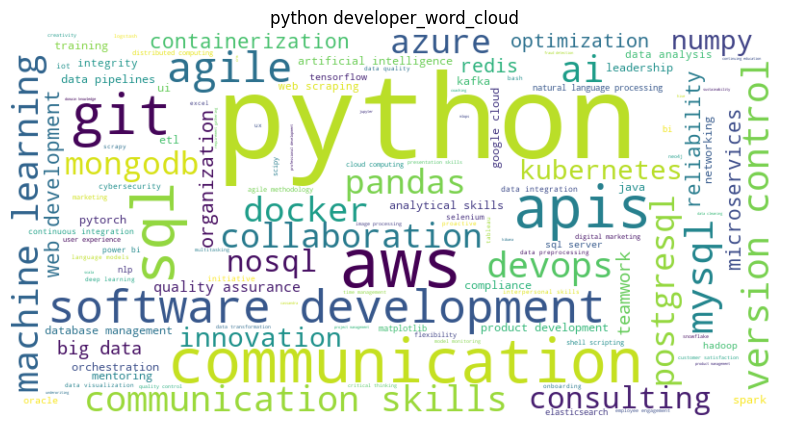

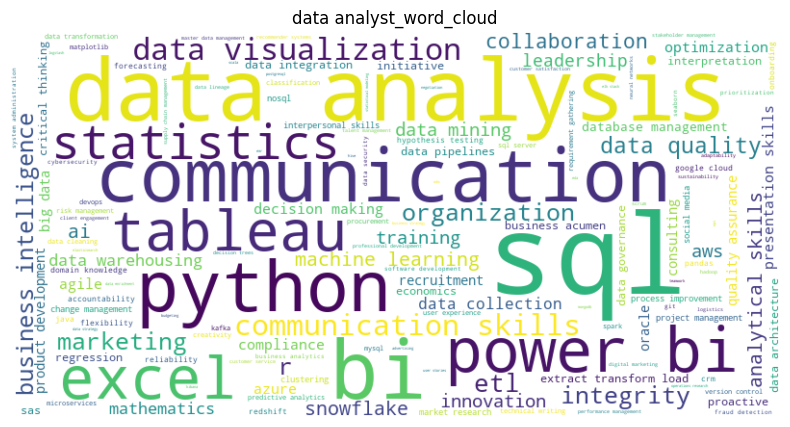

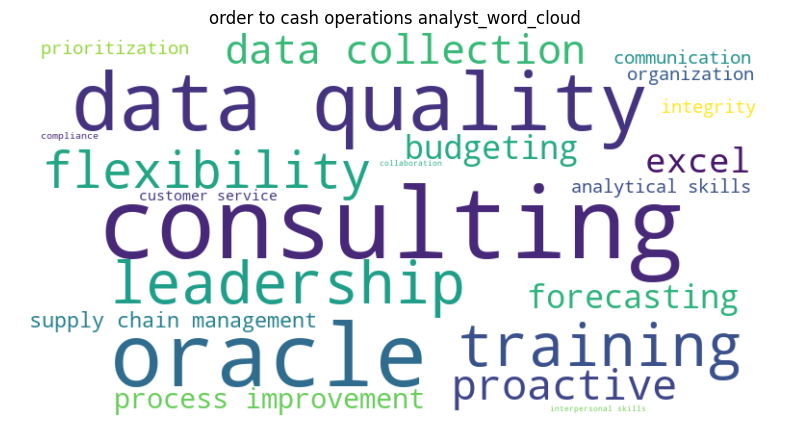

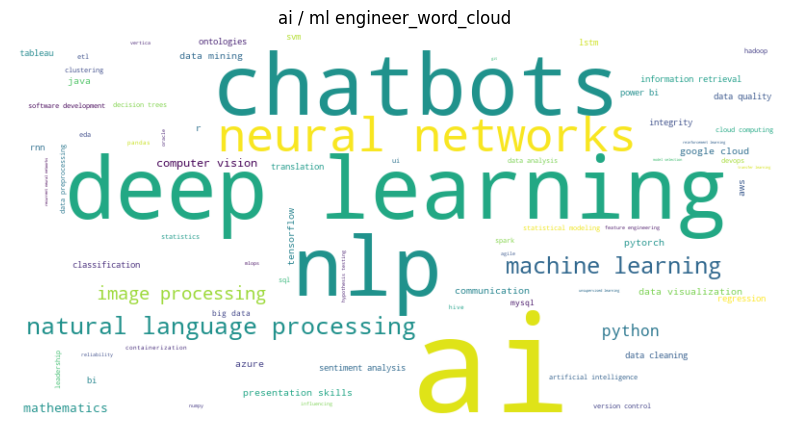

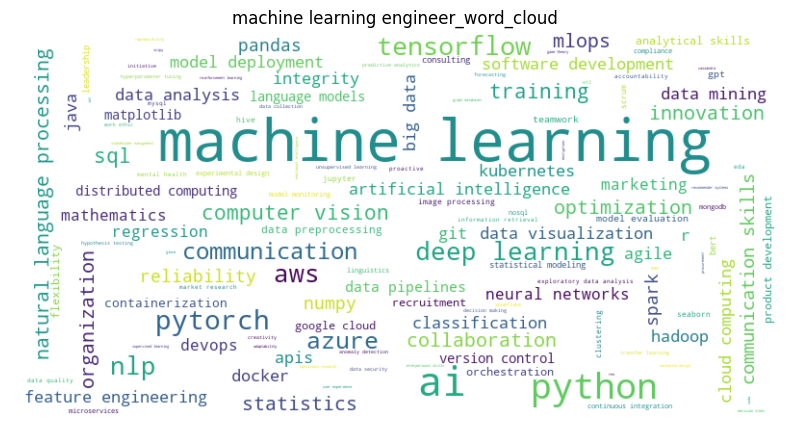

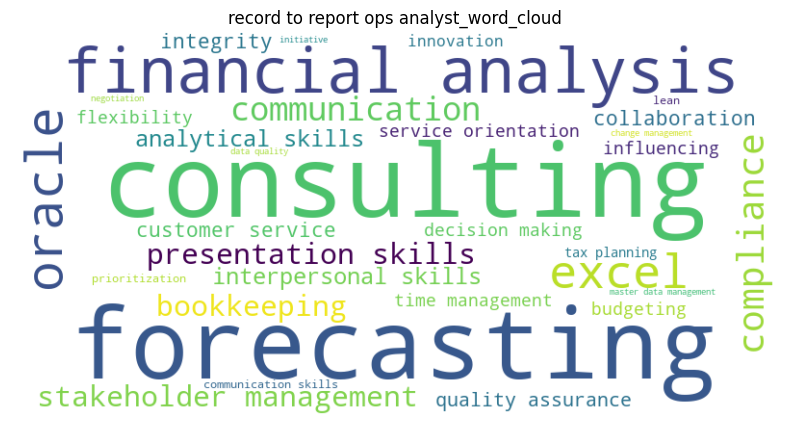

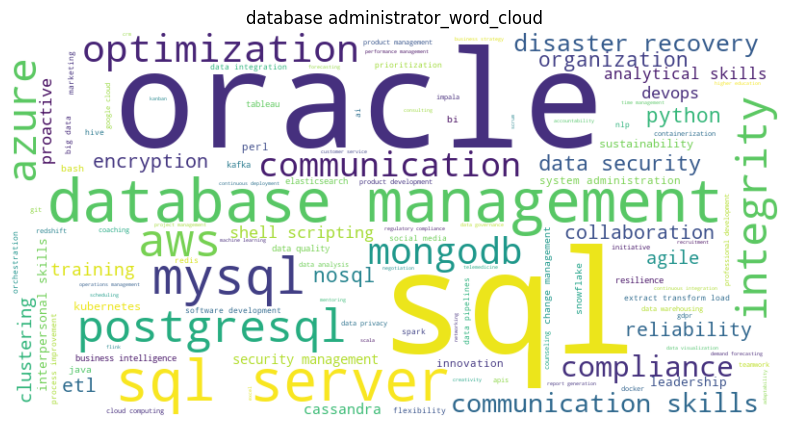

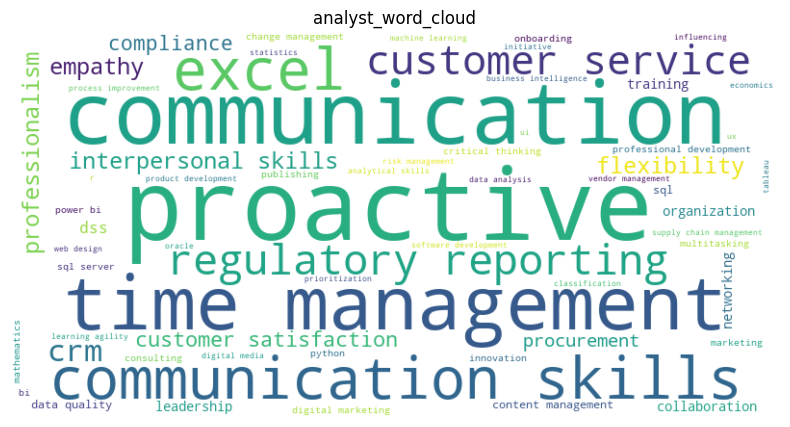

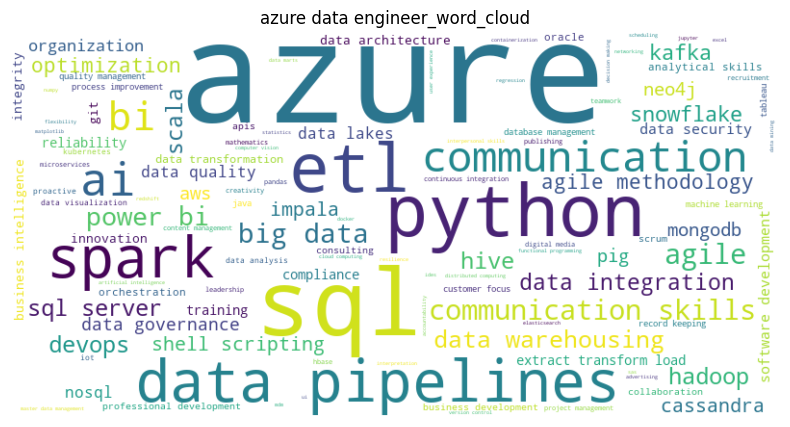

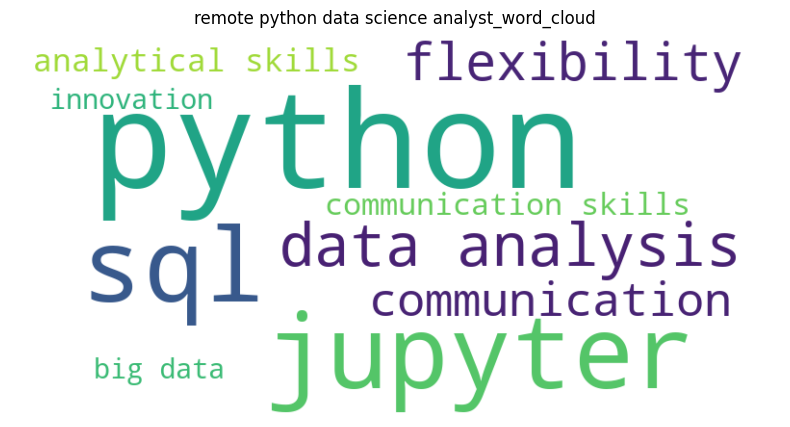

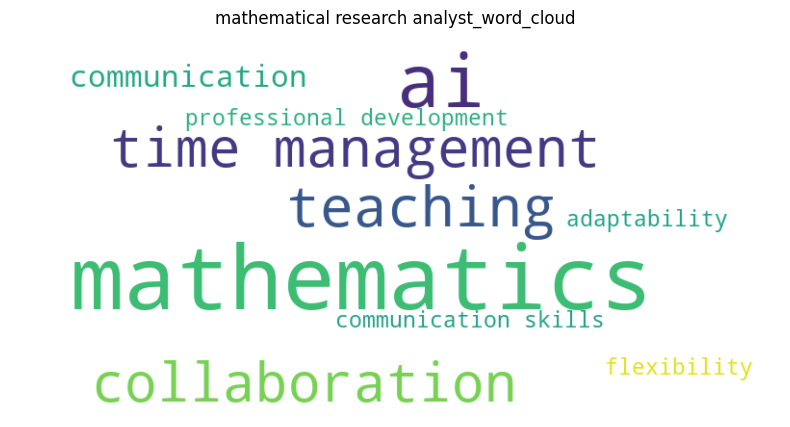

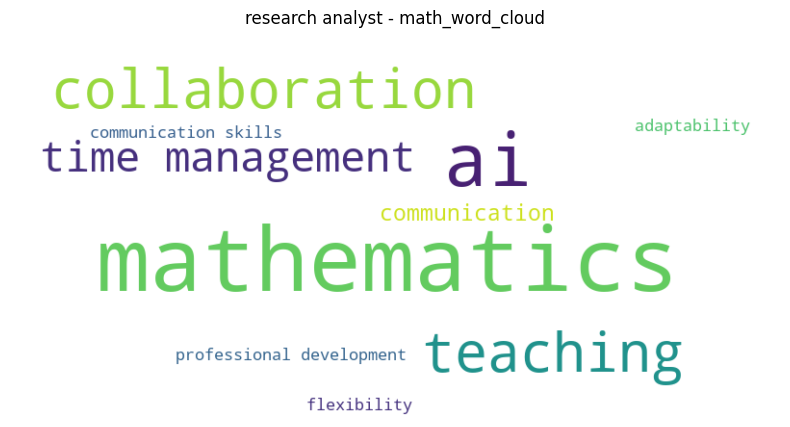

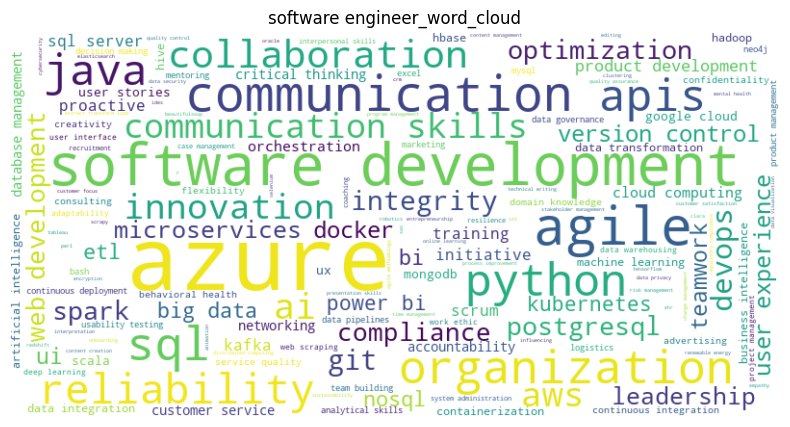

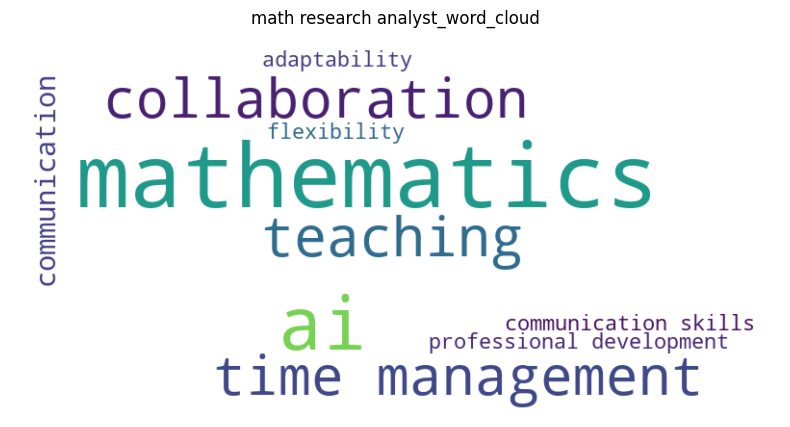

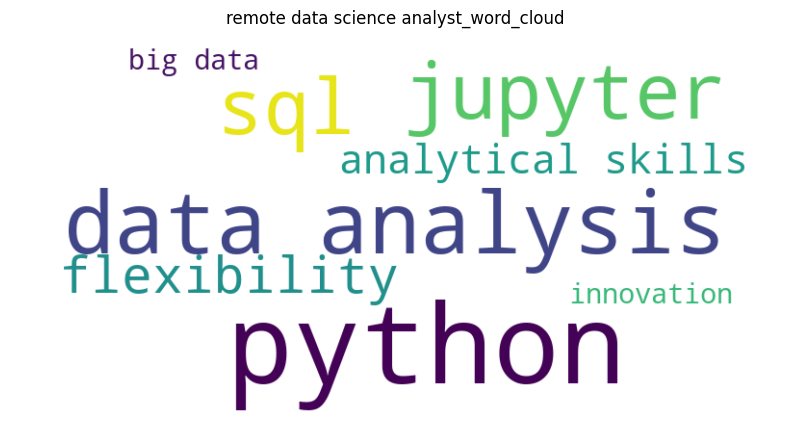

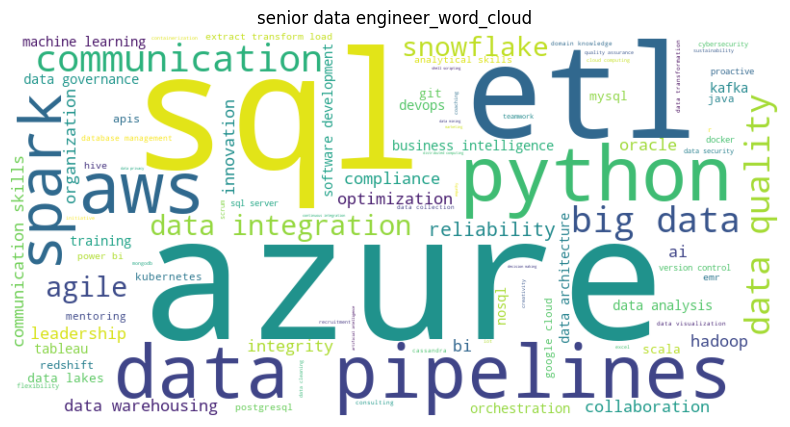

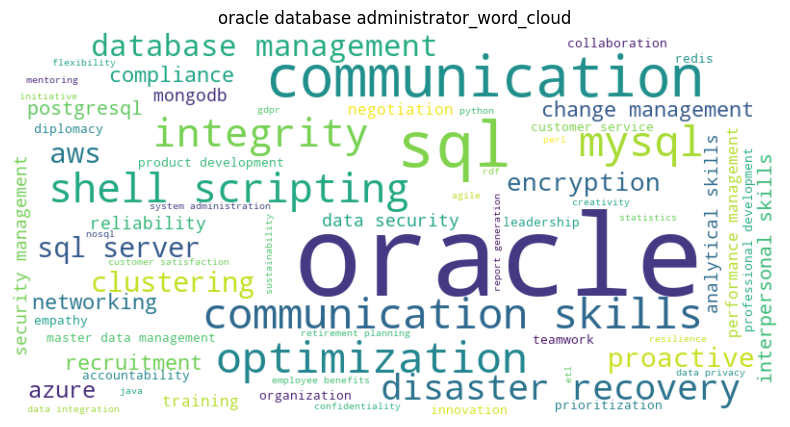

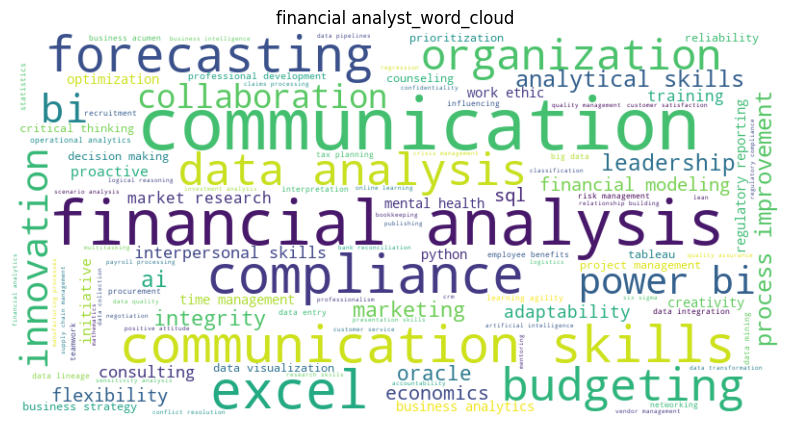

In [16]:
for job_category in job_categories:
    text_data = data[data['job_title']==job_category]['job_description'].tolist()

    preprocessed_text_data = [preprocess_text(desc) for desc in text_data]

    combined_text = ' '.join(preprocessed_text_data)

    keyword_freq = Counter()
    for keyword in job_keywords:
        keyword_freq[keyword] = combined_text.count(keyword)

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{job_category}_word_cloud')
    plt.show()

In [35]:
data.to_csv('jobs_df.csv',index= False)

In [33]:
text_data= data['job_description'].tolist()
text_data[:5]

['About the job\nCandidates need to have experience with MS CRM as well as Power Platform\nGrade – P2, P3 & P4(5-20 Years)\n MS Dynamic 365 Technical Consultant/Developer \nThe Dynamic 365 Technical Consultant/Developer needs to be well versed with Dynamics 365 Customer Service, Customer Service Hub, Knowledge Management, Self Service Portal, Reports & Dashboards using Power BI/SSRS, Power Automate and Power Apps.\nThe selected candidate will work as part of the development team, and report to the project manager and technical lead\nEssential Job Functions & Required Skills: \nProficient with developing, deploying, customizing and integrating Dynamics 365 Customer Service\nProficiency in designing, developing and implementing business processes, plugins and workflows\nExperience in designing and creating custom entities and relationships between those entities\nExperience in handling multiple business unit with data segregation and cross BU access/roles\nStrong hand on experience in de

In [36]:
# Function to clean and extract skills from text
def extract_skills(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s\n]', '', text)
    extracted_skills = [job_keyword for job_keyword in job_keywords if job_keyword in text]
    return extracted_skills

In [38]:
for text in text_data[:5]:    
    print(extract_skills(text))

[' power bi ', ' predictive analytics ', ' ai ', ' azure ', ' bi ', ' devops ', ' crm ', ' customer service ', ' software development ', ' customer service ', ' customer service ', ' customer service ', ' customer service ', ' customer service ']
[' collaboration ', ' compliance ', ' communication ', ' collaboration ', ' initiative ', ' integrity ', ' collaboration ', ' compliance ']
[' python ', ' sql ', ' ai ', ' cloud computing ', ' aws ', ' data integration ', ' java ', ' apis ', ' communication skills ', ' agile ', ' training ', ' communication ', ' organization ', ' software development ']
[' python ', ' agile ', ' scrum ', ' initiative ']
[' tableau ', ' power bi ', ' excel ', ' bi ', ' communication ', ' multitasking ', ' economics ', ' economics ', ' economics ', ' economics ', ' economics ']


In [ ]:
text_data = input('copy past text in your resume here\n')

In [ ]:
# text_data = data[data['job_category']==job_category]['job_description'].tolist()

In [ ]:
preprocessed_text_data = preprocess_text(text_data)

# combined_text = ' '.join(preprocessed_text_data)

In [ ]:
preprocessed_text_data

In [ ]:
keyword_freq = Counter()
for keyword in job_keywords:
    keyword_freq[keyword] = preprocessed_text_data.count(keyword)

# Print keyword frequencies to check the content
# print("Keyword Frequencies:", keyword_freq)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Resume_word_cloud')
plt.show()

In [ ]:
# Convert the Counter to a dictionary
counter_dict = dict(keyword_freq)

# Create a DataFrame from the dictionary
df = pd.DataFrame(list(counter_dict.items()), columns=['Skill', 'Count'])

print(df.sort_values(by= 'Count',ascending=False).head(20))

In [ ]:
# Assuming you have your resume text in a variable called `resume_text`
resume_text = input("""
Your resume text goes here. Make sure it contains the skills you want to match.
""")


In [39]:


import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Ensure nltk data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the job data
jobs_df = data

# Assuming you have your resume text in a variable called `resume_text`
resume_text = input("""
Your resume text goes here. Make sure it contains the skills you want to match.
""")

# Function to extract skills (tokens) from text
def extract_skills(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Extract skills from the resume
resume_skills = extract_skills(resume_text)

# Function to match job descriptions with resume skills
def match_skills(job_description, resume_skills):
    job_skills = extract_skills(job_description)
    common_skills = set(job_skills) & set(resume_skills)
    return len(common_skills), common_skills

# Apply the matching function to each job description
jobs_df['matches'] = jobs_df['job_description'].apply(lambda x: match_skills(x, resume_skills)[0])
jobs_df['common_skills'] = jobs_df['job_description'].apply(lambda x: match_skills(x, resume_skills)[1])

# Sort jobs by the number of matching skills
top_jobs = jobs_df.sort_values(by='matches', ascending=False)

# Display the top jobs
print(top_jobs[['job_title', 'matches', 'common_skills']])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\as429\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\as429\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Your resume text goes here. Make sure it contains the skills you want to match.
Ankit Gaikar Mumbai, India Ankitsgaikar@gmail.com | +91 8286016689 | LinkedIn | Kaggle | Github _________________________________________________________________________________________________________ CAREER OBJECTIVE: Passionate Data Analyst with 4 years of experience in the Defence Industry as a Radar Engineer. Proficient in SQL, Python, and Excel, Skilled in data analytics, visualization, and problem-solving. Seeking opportunities to apply advanced data science techniques to drive insights and deliver value. PROFESSIONAL SUMMARY: • Experience working with Machine learning algorithms like Linear Regression, Logistic Regression, SVM, kNN, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, K means. • Hyperparameter tuning of models and Dimensionality Reduction like PCA, LDA. • Performing Exploratory Data Analysis (EDA) and ETL process from various sources. • Feature Engineering in Python – missing

In [5]:
data.head()

job_id              Keywords  \
0  2787267844  Technical Consultant   
1  2985065172    Operations Analyst   
2  3018289129      Python Developer   
3  3018289169  Technical Consultant   
4  3018289278    Operations Analyst   

                                       job_title  \
0  MS Dynamic 365 Technical Consultant/Developer   
1  Sr. Analyst Business Process – Internal Audit   
2                              Software Engineer   
3                            Software Consultant   
4         Business Operations Analyst, Associate   

                     company_name                 job_location  \
0  LTI - Larsen & Toubro Infotech   Mumbai, Maharashtra, India   
1            Luminar Technologies      New Delhi, Delhi, India   
2                  Partners Group   Mumbai Metropolitan Region   
3               Hexagon R&D India  Hyderabad, Telangana, India   
4                        Qualcomm  Bengaluru, Karnataka, India   

            date_posted       num_applicants  \
0  Reposted 2 years ago                 None   
1   Reposted 2 days ago  Over 100 applicants   
2            1 week ago        75 applicants   
3            1 week ago         4 applicants   
4            1 week ago  Over 100 applicants   

                                            insights  \
0  Remote\nMatches your job preferences, workplac...   
1  On-site\nMatches your job preferences, workpla...   
2  Hybrid\nMatches your job preferences, workplac...   
3  Hybrid\nMatches your job preferences, workplac...   
4  Full-time\nMatches your job preferences, job t...   

                                            job_link  \
0  https://www.linkedin.com/jobs/view/2787267844/...   
1  https://www.linkedin.com/jobs/view/2985065172/...   
2  https://www.linkedin.com/jobs/view/3018289129/...   
3  https://www.linkedin.com/jobs/view/3018289169/...   
4  https://www.linkedin.com/jobs/view/3018289278/...   

                                     job_description  
0  About the job\nCandidates need to have experie...  
1  About the job\nLuminar is a global automotive ...  
2  About the job\nWhat It's About\n\nThe Business...  
3  About the job\nResponsibilities\n\nDesign & im...  
4  About the job\nCompany\n\nQualcomm India Priva...

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure nltk data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the job data
jobs_df = data


# Define a list of skills
skills_list = job_keywords

# Function to extract skills from text
def extract_skills(text, skills_list):
    text = text.lower()
    skills_found = []
    for skill in skills_list:
        if skill in text:
            skills_found.append(skill)
    return skills_found

# Extract skills from the resume
resume_skills = extract_skills(resume_text, skills_list)

# Function to match job descriptions with resume skills and calculate match percentage
def match_skills(job_description, resume_skills, skills_list):
    job_skills = extract_skills(job_description, skills_list)
    common_skills = set(job_skills) & set(resume_skills)
    if len(job_skills) == 0:
        match_percentage = 0
    else:
        match_percentage = len(common_skills) / len(job_skills) * 100
    return match_percentage, common_skills

# Apply the matching function to each job description
jobs_df['match_percentage'] = jobs_df['job_description'].apply(lambda x: match_skills(x, resume_skills, skills_list)[0])
jobs_df['common_skills'] = jobs_df['job_description'].apply(lambda x: match_skills(x, resume_skills, skills_list)[1])

In [ ]:
# Sort jobs by the match percentage
top_jobs = jobs_df.sort_values(by='match_percentage', ascending=False)

In [52]:
# Display the top jobs
display(top_jobs[['job_title', 'match_percentage', 'common_skills']])

job_title  match_percentage  \
10351                  senior sql database administrator               100   
4604                                haber-data scientist               100   
6061                          sql database administrator               100   
8181                  remote python data science analyst               100   
6049   ilink digital - business &amp; data analyst - sql               100   
...                                                  ...               ...   
7813             order to cash operations senior analyst                 0   
7843                                     biostatistician                 0   
7847              python developer (kubernetes & jenkin)                 0   
7870                                data analyst in pune                 0   
14173   analyst, data engineer, middle office technology                 0   

                                           common_skills  
10351                            { sql ,  optimization }  
4604                                { machine learning }  
6061            { sql ,  optimization ,  communication }  
8181   { jupyter ,  python ,  communication ,  data a...  
6049                            { sql ,  communication }  
...                                                  ...  
7813                                                  {}  
7843                                                  {}  
7847                                                  {}  
7870                                                  {}  
14173                                                 {}  

[14174 rows x 3 columns]

In [56]:
top_jobs[['job_description','matches','common_skills','match_percentage']].head()

job_description  \
10351                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      About the job\nTCS Hiring for role of \n\nRole: SQL Architect\nLocation: Chennai/Bangalore/Pune\nExperience: 10-15 yrs\nKeywords: SQL DBA, SSIS, performance tunes SQL Queries\n\nMust-Have\nThrough knowledge of SQL Coding and experience writing performance tunes SQL Queries using latest features of MS SQL 2017/2019. \nGood expertise with query optimization and analysis to debug the SQL Code\nThrough knowledge of SQL Concepts such as Ranking, joins, stored procedures, functions, dynamic queries, and other major SQL concepts. \nGood-to-Have\nGood expertise with SSIS and knowledge of SSIS logging, execution and debugging   
4604   About the job\nDesignation/Role : Data Scientist lead\n\nRole : Data Scientist lead\n\nExperience : 6-9years\n\nLocation : Pune\n\nWorking Days: 5 Days a week\n\nMust have skills: Data Scientist\n\nWe are seeking an experienced Data Science Lead with a proven track record in the chemical/specialty chemical industry. The ideal candidate will have extensive experience in process automation and a strong background in utilizing data science techniques to drive actionable insights and optimize operational processes.\n\nResponsibilities\n\nLead a team of data scientists and analysts in developing and implementing data-driven solutions to address business challenges and drive operational efficiency.\n\nCollaborate closely with cross-functional teams, including R&D, manufacturing, engineering, and IT, to identify opportunities for leveraging data science techniques to improve processes and outcomes.\n\nUtilize advanced statistical and machine learning techniques to analyze large datasets and extract meaningful insights that support strategic decision-making.\n\nAbout Haber\n\nWith a mission to help industries become sustainable by converting data to actionable intelligence, our AI+IoT based technology helps our customers spend less time collecting and analysing data by predicting results and driving value in real-time. Our technology has been assuring performance and significantly reducing operating costs, as well as, reducing water and energy footprints for our customers.\n\nOver the past few years there has been an explosio

In [55]:
pd.set_option('display.max_colwidth', None)

In [ ]:
import pandas as pd
import re
from collections import Counter

# Load the job data
jobs_df = data

# Concatenate all job descriptions into one text
all_descriptions = ' '.join(jobs_df['job_description'].dropna().astype(str))

# Tokenize the text and find the most common multi-word phrases
words = all_descriptions.lower().split()
word_counts = Counter(words)

# Extract multi-word phrases (bigrams and trigrams)
bigrams = zip(words, words[1:])
trigrams = zip(words, words[1:], words[2:])

# Count occurrences of multi-word phrases
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Extract common multi-word skills
common_bigrams = [' '.join(bigram) for bigram, count in bigram_counts.items() if count > 1]
common_trigrams = [' '.join(trigram) for trigram, count in trigram_counts.items() if count > 1]

# Combine and deduplicate skills list
skills_list = list(set(common_bigrams + common_trigrams))

In [ ]:
# Save the skills list to a CSV file
skills_df = pd.DataFrame(skills_list, columns=['skill'])
skills_df.to_csv('/mnt/data/skills_list.csv', index=False)

In [59]:
skills_df

skill
0                      -> open
1                     rest gen
2        methodologies ability
3                  party teams
4                  ms excel is
...                        ...
1098888          are following
1098889          dax to create
1098890             in health,
1098891        implement basic
1098892   dms, redshift, glue,

[1098893 rows x 1 columns]